<h1> Softmax Implementation</h1>

[  9.99999998e-01   2.06115362e-09   6.91440009e-13]


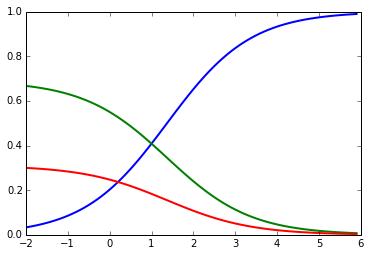

In [26]:
%matplotlib inline
import numpy as np


scores = [30,10,2] 

def softmax(x):
    
    return np.exp(x) / np.sum(np.exp(x),axis=0)

    
print(softmax(scores))


import matplotlib.pyplot as plt

x = np.arange(-2.0,6.0,0.1)
scores = np.vstack([x, np.ones_like(x),0.2 * np.ones_like(x)])
plt.plot(x, softmax(scores).T,linewidth=2)
plt.show()

In [26]:
import tensorflow as tf
import numpy as np

In [88]:
x = tf.constant([[1.0, 2], [3, 4]])
x2=tf.norm(x,axis=1)
y = tf.matmul(x,x)

In [89]:
g = tf.get_default_graph()


In [90]:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x,com_y = sess.run([x2,y])

In [91]:
computed_x

array([ 2.23606801,  5.        ], dtype=float32)

In [23]:
print(x)

Tensor("my_x:0", shape=(100,), dtype=float32)


In [36]:
x1 = tf.Variable(tf.truncated_normal([10,10]))

In [37]:
g = tf.get_default_graph()

In [41]:
sess = tf.Session()


In [93]:
[op.name for op in g.get_operations()]

[u'LinSpace/start',
 u'LinSpace/stop',
 u'LinSpace/num',
 u'LinSpace',
 u'Tensordot_1/range/start',
 u'Tensordot_1/range/limit',
 u'Tensordot_1/range/delta',
 u'Tensordot_1/range',
 u'Tensordot_1/range_1/start',
 u'Tensordot_1/range_1/limit',
 u'Tensordot_1/range_1/delta',
 u'Tensordot_1/range_1',
 u'Tensordot_1/Shape',
 u'Tensordot_1/Rank',
 u'Tensordot_1/GreaterEqual/y',
 u'Tensordot_1/GreaterEqual',
 u'Tensordot_1/Cast',
 u'Tensordot_1/mul',
 u'Tensordot_1/Less/y',
 u'Tensordot_1/Less',
 u'Tensordot_1/Cast_1',
 u'Tensordot_1/add',
 u'Tensordot_1/mul_1',
 u'Tensordot_1/add_1',
 u'Tensordot_1/range_2/start',
 u'Tensordot_1/range_2/delta',
 u'Tensordot_1/range_2',
 u'Tensordot_1/ListDiff',
 u'Tensordot_1/Gather',
 u'Tensordot_1/Gather_1',
 u'Tensordot_1/Const',
 u'Tensordot_1/Prod',
 u'Tensordot_1/Const_1',
 u'Tensordot_1/Prod_1',
 u'Tensordot_1/concat/axis',
 u'Tensordot_1/concat',
 u'Tensordot_1/concat_1/axis',
 u'Tensordot_1/concat_1',
 u'Tensordot_1/stack',
 u'Tensordot_1/transpose

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

In [100]:
from skimage import data
img = data.camera()

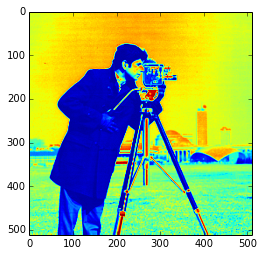

In [101]:
plt.imshow(img)

In [117]:
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx

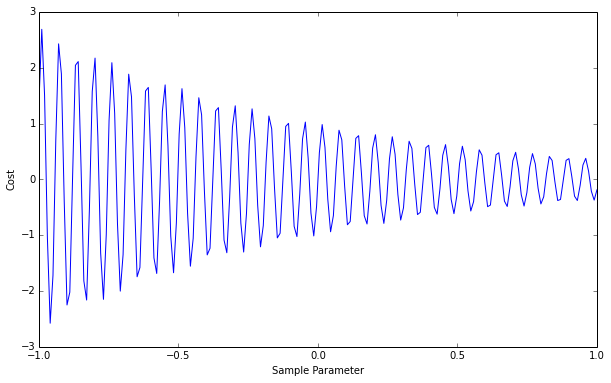

In [119]:
fig = plt.figure(figsize=(10,6))
ax=fig.gca()
x = np.linspace(-1,1,200)
hz =100
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Sample Parameter')
plt.show()

In [118]:
gradient = np.diff(cost)

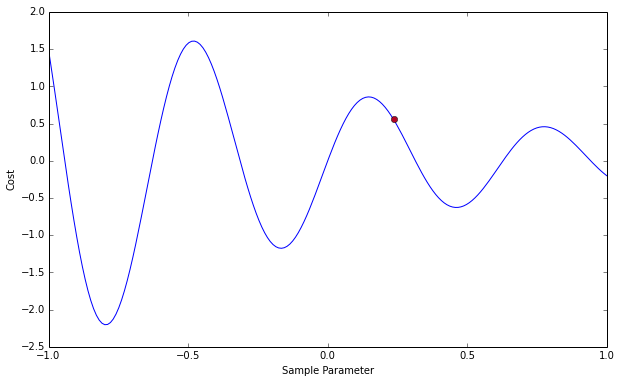

In [147]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Sample Parameter')
n_iterations = 500


cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p=120
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(round(init_p))]
    ax.plot(x[int(round(init_p))], cost[int(round(init_p))], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In [144]:
round(init_p)

120.0

In [128]:
gradient

array([ 1.31302478, -1.18388577, -2.54348727, -1.53936319,  0.85897256,
        2.42045456,  1.7272222 , -0.53899223, -2.264944  , -1.87577408,
        0.22890145,  2.0814054 ,  1.9848839 ,  0.06679532, -1.87448764,
       -2.0550712 , -0.34409315,  1.64895077,  2.08746313,  0.59952308,
       -1.40958152, -2.08374048, -0.83017765,  1.16111324,  2.04607766,
        1.03372565, -0.90815145, -1.97707822, -1.20841666,  0.65510583,
        1.87970706,  1.35307572, -0.40612937, -1.75722063, -1.46708893,
        0.16506532,  1.61309654,  1.55038071,  0.06459767, -1.45096359,
       -1.60338346, -0.279762  ,  1.27453343,  1.62700083,  0.47774901,
       -1.08753489, -1.62256529, -0.65631838,  0.89365181,  1.59179119,
        0.81367919, -0.69646534, -1.5367243 , -0.94849299,  0.49940118,
        1.45968892,  1.05986926, -0.3056826 , -1.36323345, -1.14735381,
        0.11828936,  1.25007549,  1.21091066,  0.06007683, -1.12304743,
       -1.25089818, -0.22702031,  0.98504325,  1.26804012,  0.38

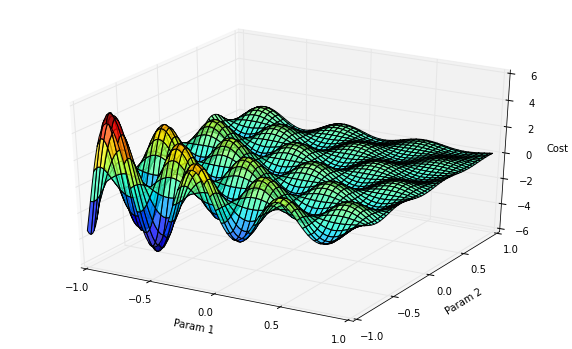

In [137]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Param 1')
ax.set_ylabel('Param 2')
ax.set_zlabel('Cost')


2.0